In [1]:
from dataload import load_data
from clustering import run_clustering_experiments
from dimension_reduction import run_dr_experiments
from nn import run_nn
import matplotlib.pyplot as plt
import numpy as np

Yeast Data

In [2]:
# Breast Cancer Data
data_name = 'yeast'

train_x, test_x, train_y, test_y = load_data(data_name)

In [3]:
kmeans, em = run_clustering_experiments(train_x, test_x, train_y, data_name, True, 
                                         kmeans_n=6, em_n=8, em_cov='diag')

KMEANS
Homogeneity: 0.19844784417567202
Completeness: 0.2385164412916081
V Measure: 0.2166450446821113
Adjusted Random: 0.11127399667797894
Adjusted MI: 0.20800992574072483
Silhouette: 0.22599381715644126
EM
Homogeneity: 0.1930969635818644
Completeness: 0.19161659940719925
V Measure: 0.19235393330005615
Adjusted Random: 0.11463561097183028
Adjusted MI: 0.18111929583749295
Silhouette: 0.05947193241745253


In [4]:
#PCA (n) ICA (n) KPCA (n, kernel (poly, rbf, sigmoid, cosine)) RP (n, runs)
dr_outputs = run_dr_experiments(train_x, test_x, train_y, data_name, True,
                                pca_n=7, ica_n=7, kpca_n=6, kpca_kernel='poly',
                                rp_n=8, rp_runs=50)

PCA
Explained variance [n components = 7]= 0.999
pca, yeast recon: 0.0011067958895446535
ICA
ica, yeast recon: 0.0011067958895446535
Kernel PCA

Plot Model Complexity
Kernel = rbf - Explained variance [n components = 6]= 0.876
Kernel = poly - Explained variance [n components = 6]= 0.973
Kernel = sigmoid - Explained variance [n components = 6]= 0.971
Kernel = cosine - Explained variance [n components = 6]= 0.987
kpca, yeast recon: 0.19594986112950896
RP
k = [2, ..., 8] --> 
Reconstruction errors = [0.77 0.67 0.55 0.45 0.34 0.24 0.13 0.07]
rp, yeast recon: 0.0011235955056179761


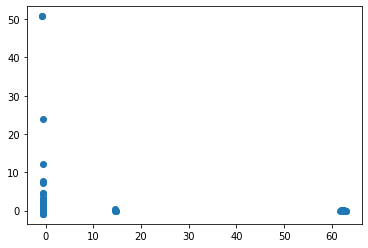

In [19]:
import matplotlib.pyplot as plt
kpcas = dr_outputs['KPCA']['train']
plt.scatter(kpcas[:,0],kpcas[:,1])

In [5]:
dr_clusters = {}
for dr_type, x_dr in dr_outputs.items():
    dr_kmeans, dr_em = run_clustering_experiments(x_dr['train'], x_dr['test'], train_y, f"DR_{data_name}_{dr_type}", True, 
                                         kmeans_n=2, em_n=2, em_cov='full')
    dr_clusters[dr_type] = {
        'kmeans': dr_kmeans,
        'em': dr_em
    }

KMEANS
k = 1 -->  inertia = 9377.138
k = 2 -->  inertia = 7939.156
k = 3 -->  inertia = 6634.422
k = 4 -->  inertia = 5809.569
k = 5 -->  inertia = 5052.706
k = 6 -->  inertia = 4528.738
k = 7 -->  inertia = 4076.775
k = 8 -->  inertia = 3764.639
k = 9 -->  inertia = 3614.691
k = 10 -->  inertia = 3486.663
k = 11 -->  inertia = 3339.272
Homogeneity: 0.09459332225567958
Completeness: 0.2580118666973409
V Measure: 0.1384335819036559
Adjusted Random: 0.12543610555850807
Adjusted MI: 0.1358660930884638
Silhouette: 0.010466652807093989
EM
cv = spherical, k = 2 --> aic = 24740.463, bic = 24828.806
cv = spherical, k = 3 --> aic = 24065.565, bic = 24200.679
cv = spherical, k = 4 --> aic = 23508.457, bic = 23690.342
cv = spherical, k = 5 --> aic = 23094.962, bic = 23323.617
cv = spherical, k = 6 --> aic = 22552.398, bic = 22827.822
cv = spherical, k = 7 --> aic = 22156.940, bic = 22479.134
cv = spherical, k = 8 --> aic = 21881.674, bic = 22250.639
cv = spherical, k = 9 --> aic = 21699.328, bic 

In [13]:
run_clustering_experiments(train_x, test_x, train_y, data_name, False, em_n=8, em_cov='diag',kmeans_n=6)

KMEANS
k = 1 -->  inertia = 9388.959
k = 2 -->  inertia = 7950.976
k = 3 -->  inertia = 6646.770
k = 4 -->  inertia = 5821.313
k = 5 -->  inertia = 5064.521
k = 6 -->  inertia = 4540.554
k = 7 -->  inertia = 4088.588
k = 8 -->  inertia = 3776.573
k = 9 -->  inertia = 3625.952
k = 10 -->  inertia = 3493.050
k = 11 -->  inertia = 3359.099
Homogeneity: 0.19844784417567202
Completeness: 0.2385164412916081
V Measure: 0.2166450446821113
Adjusted Random: 0.11127399667797894
Adjusted MI: 0.20800992574072483
Silhouette: 0.22599381715644126
EM
cv = spherical, k = 2 --> aic = 26700.400, bic = 26799.137
cv = spherical, k = 3 --> aic = 25881.991, bic = 26032.695
cv = spherical, k = 4 --> aic = 25154.796, bic = 25357.466
cv = spherical, k = 5 --> aic = 24597.358, bic = 24851.995
cv = spherical, k = 6 --> aic = 23900.242, bic = 24206.846
cv = spherical, k = 7 --> aic = 23370.213, bic = 23728.785
cv = spherical, k = 8 --> aic = 23000.153, bic = 23410.691
cv = spherical, k = 9 --> aic = 22761.557, bic 

((array([5, 0, 1, ..., 3, 5, 5], dtype=int32),
  array([1, 3, 5, 5, 0, 1, 1, 5, 5, 5, 1, 5, 1, 3, 5, 5, 5, 5, 5, 3, 5, 4,
         5, 5, 1, 4, 0, 3, 4, 5, 5, 5, 4, 5, 5, 1, 5, 4, 5, 4, 4, 4, 4, 1,
         5, 5, 5, 3, 0, 5, 0, 5, 3, 5, 3, 5, 3, 5, 5, 3, 3, 5, 5, 1, 5, 5,
         5, 1, 5, 5, 5, 5, 4, 5, 5, 5, 4, 1, 5, 4, 5, 5, 3, 1, 5, 0, 5, 1,
         1, 0, 5, 1, 5, 5, 5, 4, 5, 3, 3, 0, 4, 5, 3, 5, 0, 5, 0, 4, 5, 3,
         5, 3, 1, 3, 5, 1, 0, 5, 4, 5, 5, 5, 5, 4, 5, 0, 3, 5, 5, 3, 2, 5,
         4, 5, 4, 5, 1, 3, 5, 5, 0, 1, 3, 5, 5, 1, 5, 5, 1], dtype=int32)),
 (array([9, 5, 8, ..., 0, 9, 9]),
  array([3, 0, 9, 9, 5, 8, 8, 7, 9, 7, 6, 7, 6, 8, 2, 2, 9, 9, 7, 8, 7, 4,
         9, 5, 6, 8, 7, 0, 4, 9, 9, 0, 4, 9, 9, 6, 2, 7, 9, 5, 9, 4, 9, 8,
         9, 7, 9, 0, 7, 2, 7, 0, 0, 9, 0, 9, 0, 9, 7, 0, 0, 9, 7, 9, 2, 9,
         2, 8, 9, 7, 9, 7, 4, 7, 9, 9, 4, 6, 7, 4, 2, 9, 0, 6, 0, 7, 3, 6,
         2, 7, 7, 0, 2, 9, 7, 9, 9, 0, 4, 7, 9, 2, 0, 9, 7, 9, 4, 0, 7, 0,
         9, 0, 6, 

In [4]:
run_clustering_experiments(dr_outputs['PCA']['train'], dr_outputs['PCA']['test'], train_y, data_name, False, em_n=6, em_cov='full',kmeans_n=6)

KMEANS
Homogeneity: 0.19844784417567202
Completeness: 0.2385164412916081
V Measure: 0.2166450446821113
Adjusted Random: 0.11127399667797894
Adjusted MI: 0.20800992574072483
Silhouette: 0.22648294857542403
EM
Homogeneity: 0.11823234741743331
Completeness: 0.13629515529959035
V Measure: 0.1266228284226701
Adjusted Random: 0.041388357220646904
Adjusted MI: 0.11717730711418468
Silhouette: -0.004731018094978573


((array([5, 0, 1, ..., 3, 5, 5], dtype=int32),
  array([1, 3, 5, 5, 0, 1, 1, 5, 5, 5, 1, 5, 1, 3, 5, 5, 5, 5, 5, 3, 5, 4,
         5, 5, 1, 4, 0, 3, 4, 5, 5, 5, 4, 5, 5, 1, 5, 4, 5, 4, 4, 4, 4, 1,
         5, 5, 5, 3, 0, 5, 0, 5, 3, 5, 3, 5, 3, 5, 5, 3, 3, 5, 5, 1, 5, 5,
         5, 1, 5, 5, 5, 5, 4, 5, 5, 5, 4, 1, 5, 4, 5, 5, 3, 1, 5, 0, 5, 1,
         1, 0, 5, 1, 5, 5, 5, 4, 5, 3, 3, 0, 4, 5, 3, 5, 0, 5, 0, 4, 5, 3,
         5, 3, 1, 3, 5, 1, 0, 5, 4, 5, 5, 5, 5, 4, 5, 0, 3, 5, 5, 3, 2, 5,
         4, 5, 4, 5, 1, 3, 5, 5, 0, 1, 3, 5, 5, 1, 5, 5, 1], dtype=int32)),
 (array([4, 2, 0, ..., 5, 4, 4]),
  array([4, 5, 4, 4, 2, 0, 0, 3, 4, 2, 4, 3, 4, 2, 3, 3, 4, 4, 3, 2, 2, 0,
         4, 2, 4, 3, 2, 5, 2, 4, 4, 5, 0, 4, 4, 4, 3, 3, 4, 0, 4, 0, 4, 0,
         4, 3, 4, 5, 2, 3, 2, 4, 5, 4, 5, 4, 5, 5, 3, 5, 5, 4, 3, 4, 3, 4,
         3, 0, 4, 3, 4, 2, 2, 3, 4, 4, 0, 4, 3, 2, 3, 4, 5, 4, 5, 2, 3, 4,
         3, 2, 2, 4, 3, 4, 3, 4, 4, 5, 2, 2, 4, 3, 5, 4, 2, 4, 2, 5, 3, 4,
         4, 5, 4, 

In [14]:
run_clustering_experiments(dr_outputs['RP']['train'], dr_outputs['RP']['test'], train_y, f"DR_{data_name}_RP", True, em_n=6, em_cov='full',kmeans_n=4)

KMEANS
k = 1 -->  inertia = 12826.918
k = 2 -->  inertia = 9153.989
k = 3 -->  inertia = 7859.831
k = 4 -->  inertia = 6507.289
k = 5 -->  inertia = 5529.691
k = 6 -->  inertia = 4826.629
k = 7 -->  inertia = 4380.576
k = 8 -->  inertia = 4107.871
k = 9 -->  inertia = 3845.590
k = 10 -->  inertia = 3625.154
k = 11 -->  inertia = 3414.085
Homogeneity: 0.16064794613186284
Completeness: 0.2488246288720862
V Measure: 0.19524221164232136
Adjusted Random: 0.1390284992226201
Adjusted MI: 0.18948890134578555
Silhouette: 0.23244825294198765
EM
cv = spherical, k = 2 --> aic = 29244.969, bic = 29343.706
cv = spherical, k = 3 --> aic = 27461.244, bic = 27611.947
cv = spherical, k = 4 --> aic = 26492.588, bic = 26695.259
cv = spherical, k = 5 --> aic = 25383.188, bic = 25637.825
cv = spherical, k = 6 --> aic = 24642.373, bic = 24948.977
cv = spherical, k = 7 --> aic = 24007.921, bic = 24366.493
cv = spherical, k = 8 --> aic = 23549.051, bic = 23959.590
cv = spherical, k = 9 --> aic = 23165.266, bic

((array([1, 2, 0, ..., 1, 2, 1], dtype=int32),
  array([0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1,
         1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0,
         2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1,
         1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0,
         1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0,
         2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 3, 2,
         1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0], dtype=int32)),
 (array([4, 2, 0, ..., 5, 4, 4]),
  array([4, 5, 4, 4, 2, 0, 0, 3, 4, 2, 4, 3, 4, 2, 3, 3, 4, 4, 3, 2, 2, 0,
         4, 2, 4, 3, 2, 5, 2, 4, 4, 5, 0, 4, 4, 4, 3, 3, 4, 0, 4, 0, 4, 0,
         4, 3, 4, 5, 2, 3, 2, 4, 5, 4, 5, 4, 5, 5, 3, 5, 5, 4, 3, 4, 3, 4,
         3, 0, 4, 3, 4, 2, 2, 3, 4, 4, 0, 4, 3, 2, 3, 4, 5, 4, 5, 2, 3, 4,
         3, 2, 2, 4, 3, 4, 3, 4, 4, 5, 2, 2, 4, 3, 5, 4, 2, 4, 2, 5, 3, 4,
         4, 5, 4, 

In [11]:
run_clustering_experiments(dr_outputs['KPCA']['train'], dr_outputs['KPCA']['test'], train_y, data_name, False, em_n=10, em_cov='full',kmeans_n=9)

KMEANS
k = 1 -->  inertia = 52080.385
k = 2 -->  inertia = 12896.108
k = 3 -->  inertia = 7663.173
k = 4 -->  inertia = 6324.654
k = 5 -->  inertia = 5340.169
k = 6 -->  inertia = 4401.914
k = 7 -->  inertia = 3538.822
k = 8 -->  inertia = 2716.981
k = 9 -->  inertia = 2108.678
k = 10 -->  inertia = 1723.039
k = 11 -->  inertia = 1492.643
Homogeneity: 0.13671594762368616
Completeness: 0.4079948687369194
V Measure: 0.20480373596268997
Adjusted Random: 0.090944551303032
Adjusted MI: 0.19108236159309874
Silhouette: 0.628461245874036
EM
cv = spherical, k = 2 --> aic = 11558.727, bic = 11636.678
cv = spherical, k = 3 --> aic = 6540.491, bic = 6660.014
cv = spherical, k = 4 --> aic = 4973.704, bic = 5134.801
cv = spherical, k = 5 --> aic = 3302.336, bic = 3505.006
cv = spherical, k = 6 --> aic = 1941.716, bic = 2185.960
cv = spherical, k = 7 --> aic = 984.161, bic = 1269.979
cv = spherical, k = 8 --> aic = 131.078, bic = 458.469
cv = spherical, k = 9 --> aic = -339.478, bic = 29.487
cv = sph

((array([1, 1, 7, ..., 1, 1, 1], dtype=int32),
  array([7, 1, 1, 1, 5, 7, 7, 1, 1, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 7,
         1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 5, 7, 1, 1, 1, 7, 1, 1, 7], dtype=int32)),
 (array([8, 1, 9, ..., 1, 8, 8]),
  array([9, 9, 8, 8, 0, 9, 3, 1, 8, 1, 3, 1, 9, 1, 1, 1, 8, 1, 1, 1, 1, 5,
         8, 6, 9, 7, 1, 9, 6, 8, 8, 8, 5, 8, 8, 3, 7, 6, 7, 6, 7, 5, 7, 3,
         8, 6, 8, 7, 0, 1, 0, 8, 7, 8, 7, 8, 9, 8, 1, 9, 7, 8, 1, 9, 1, 8,
         1, 3, 8, 1, 8, 1, 7, 1, 8, 8, 5, 9, 1, 6, 1, 8, 9, 9, 8, 0, 1, 9,
         9, 6, 1, 8, 1, 8, 1, 7, 8, 7, 6, 1, 7, 1, 7, 8, 1, 8, 0, 7, 1, 7,
         8, 9, 9, 

In [12]:
run_clustering_experiments(dr_outputs['ICA']['train'], dr_outputs['ICA']['test'], train_y, data_name, False, em_n=6, em_cov='full',kmeans_n=3)

KMEANS
Homogeneity: 0.1128151325912375
Completeness: 0.3003164276297556
V Measure: 0.16401670007614222
Adjusted Random: 0.13224288100913692
Adjusted MI: 0.15938492083573533
Silhouette: 0.17667348044113715
EM
Homogeneity: 0.12272639637399833
Completeness: 0.13753894433929856
V Measure: 0.12971115518942913
Adjusted Random: 0.06441004434802726
Adjusted MI: 0.12043023104257447
Silhouette: 0.011320679126657596


((array([1, 1, 0, ..., 0, 1, 1], dtype=int32),
  array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
         1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
         1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
         1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
         1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1,
         1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int32)),
 (array([4, 2, 0, ..., 5, 4, 4]),
  array([4, 5, 4, 4, 2, 0, 0, 3, 5, 2, 4, 3, 4, 2, 3, 3, 5, 4, 3, 2, 3, 0,
         5, 2, 4, 3, 2, 5, 2, 5, 5, 4, 0, 4, 5, 4, 3, 3, 4, 0, 4, 4, 4, 0,
         4, 3, 4, 5, 2, 3, 2, 4, 5, 4, 5, 4, 5, 5, 3, 5, 5, 4, 3, 4, 3, 4,
         3, 0, 5, 3, 4, 3, 2, 3, 5, 5, 0, 4, 3, 2, 3, 5, 5, 4, 4, 2, 3, 5,
         3, 2, 2, 4, 3, 4, 3, 4, 4, 5, 2, 2, 4, 3, 5, 4, 2, 4, 2, 5, 3, 5,
         4, 5, 4, 

In [8]:
nn_hidden_layers = (32, 32, 16)
nn_lr = 0.05
nn_batch_size = 16
nn_max_iter=50

In [33]:
base_training_time, base_train_loss, base_test_loss = run_nn(train_x, train_y, nn_hidden_layers,
                                              nn_lr, batch_size=nn_batch_size, 
                                              max_iter=nn_max_iter,data_name="baseline")

/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilaye

In [10]:
dr_nn_out = {}
for dr_type, x_dr in dr_outputs.items():
    training_time, train_loss, test_loss = run_nn(x_dr['train'], train_y, nn_hidden_layers,
                                              nn_lr, batch_size=nn_batch_size, 
                                              max_iter=nn_max_iter,data_name=dr_type)
    dr_nn_out[dr_type] = {
        'training_time': training_time,
        'train_loss': train_loss,
        'test_loss': test_loss
    }

/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilaye

In [35]:
from sklearn.preprocessing import OneHotEncoder

clust_nn_out = {}
for cluster_name, clusters in zip(['kmeans','em'],[kmeans, em]):
    ohe = OneHotEncoder(sparse=False).fit(np.append(clusters[0], clusters[1]).reshape(-1,1))    
    train_x_aug = np.append(train_x, ohe.transform(clusters[0].reshape(-1,1)), 1)
    test_x_aug = np.append(test_x, ohe.transform(clusters[1].reshape(-1,1)), 1)
    training_time, train_loss, test_loss = run_nn(train_x_aug, train_y, nn_hidden_layers,
                                              nn_lr, batch_size=nn_batch_size, 
                                              max_iter=nn_max_iter,data_name=cluster_name)
    clust_nn_out[cluster_name] = {
        'training_time': training_time,
        'train_loss': train_loss,
        'test_loss': test_loss
    }

/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cgull/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilaye

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score

dc = DummyClassifier(strategy="most_frequent", random_state=555555)
dc.fit(train_x, train_y)

balanced_accuracy_score(train_y, dc.predict(train_x))

0.1

In [27]:
balanced_accuracy_score(test_y, dc.predict(test_x))

0.1

In [34]:
base_training_time, dr_nn_out['PCA']['training_time'], dr_nn_out['KPCA']['training_time']

(25.6158884999968, 22.896424200000183, 25.324882400003844)

In [31]:
dr_nn_out['ICA']['training_time'], dr_nn_out['RP']['training_time']

(24.300752700000885, 24.2721365000034)

In [36]:
clust_nn_out['kmeans']['training_time'], clust_nn_out['em']['training_time']

(26.37543960000039, 22.350169000004826)